## EDA - 1 
## Title - Bike Details Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('BIKE DETAILS.csv')
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [5]:
#Q1  What is the range of selling prices in the dataset ?
# Calculate the range of selling prices
selling_price_min = df['selling_price'].min()
selling_price_max = df['selling_price'].max()
selling_price_range = selling_price_max - selling_price_min

print(f"Minimum Selling Price: ₹{selling_price_min}")
print(f"Maximum Selling Price: ₹{selling_price_max}")
print(f"Range of Selling Prices: ₹{selling_price_range}")


Minimum Selling Price: ₹5000
Maximum Selling Price: ₹760000
Range of Selling Prices: ₹755000


In [6]:
#Q2 What is the median selling price for bikes in the dataset ?
# Calculate the median selling price
median_selling_price = df['selling_price'].median()
print(f"Median Selling Price: ₹{median_selling_price}")


Median Selling Price: ₹45000.0


In [8]:
#Q3 What is the most common seller type ?
# Find the most common seller type
most_common_seller_type = df['seller_type'].mode()[0]
print(f"Most Common Seller Type: {most_common_seller_type}")


Most Common Seller Type: Individual


In [11]:
#Q4 How many bikes have driven more than 50,000 kilometers ?
# Count bikes with km_driven greater than 50,000

bikes_over_50000_km = df[df['km_driven'] > 50000].shape[0]
print(f"Number of bikes driven more than 50,000 kilometers: {bikes_over_50000_km}")


Number of bikes driven more than 50,000 kilometers: 170


In [14]:
#Q5 What is the average km_driven value for each ownership type ?
# Calculate the average km_driven for each ownership type

average_km_by_ownership = df.groupby('owner')['km_driven'].mean()

# Print the results
print("Average km_driven for each ownership type:")
print(average_km_by_ownership)


Average km_driven for each ownership type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [16]:
#Q6 What proportion of bikes are from the year 2015 or older ?

# Count the total number of bikes
total_bikes = df.shape[0]

# Count the number of bikes from the year 2015 or older
bikes_2015_or_older = df[df['year'] <= 2015].shape[0]

# Calculate the proportion
proportion_2015_or_older = bikes_2015_or_older / total_bikes

print(f"Proportion of bikes from 2015 or older: {proportion_2015_or_older:.2%}")


Proportion of bikes from 2015 or older: 56.64%


In [19]:
#Q7 What is the trend of missing values across the dataset ?

# Check for missing values in each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values in each column
missing_percentage = (missing_values / len(df)) * 100

# Combine into a DataFrame for better visualization
missing_trend = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

print("Trend of missing values across the dataset:")
print(missing_trend)


Trend of missing values across the dataset:
                   Missing Values  Percentage (%)
name                            0        0.000000
selling_price                   0        0.000000
year                            0        0.000000
seller_type                     0        0.000000
owner                           0        0.000000
km_driven                       0        0.000000
ex_showroom_price             435       40.999057


In [21]:
#Q8 What is the highest ex_showroom_price recorded, and for which bike ?

# Find the row with the highest ex_showroom_price
highest_price_row = df.loc[df['ex_showroom_price'].idxmax()]

# Extract the highest price and the corresponding bike name
highest_ex_showroom_price = highest_price_row['ex_showroom_price']
bike_with_highest_price = highest_price_row['name']

print(f"Highest ex-showroom price: ₹{highest_ex_showroom_price}")
print(f"Bike with the highest ex-showroom price: {bike_with_highest_price}")


Highest ex-showroom price: ₹1278000.0
Bike with the highest ex-showroom price: Harley-Davidson Street Bob


In [22]:
#Q9 What is the total number of bikes listed by each seller type ?

# Calculate the total number of bikes listed by each seller type
bikes_by_seller_type = df['seller_type'].value_counts()

# Print the results
print("Total number of bikes listed by each seller type:")
print(bikes_by_seller_type)


Total number of bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


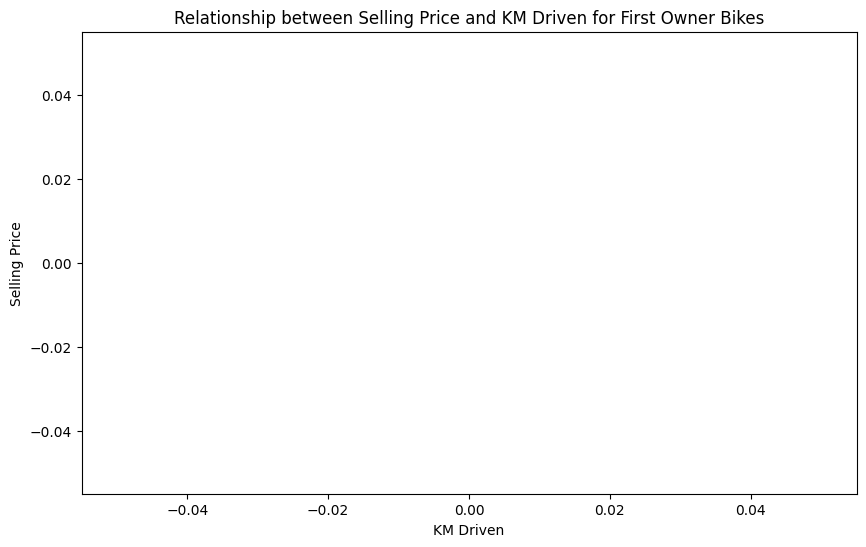

In [25]:
#Q10 What is the relationship between selling_price and km_driven for first-owner bikes ?

# Filter the data to include only first-owner bikes
first_owner_bikes = df[df['owner'] == 'First Owner']

# Plot the relationship between selling_price and km_driven with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='km_driven', y='selling_price', data=first_owner_bikes, scatter_kws={'s': 50}, line_kws={"color": "red"})
plt.title('Relationship between Selling Price and KM Driven for First Owner Bikes')
plt.xlabel('KM Driven')
plt.ylabel('Selling Price')
plt.show()

In [26]:
#Q11 Identify and remove outliers in the km_driven column using the IQR method ?

# Calculate Q1 (25th percentile) and Q3 (75th percentile) of the km_driven column
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to remove outliers
data_cleaned = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Show the number of rows removed
rows_removed = df.shape[0] - data_cleaned.shape[0]
print(f"Number of rows removed due to outliers: {rows_removed}")

# Optionally, you can view the cleaned dataset
# data_cleaned.head()



Number of rows removed due to outliers: 39


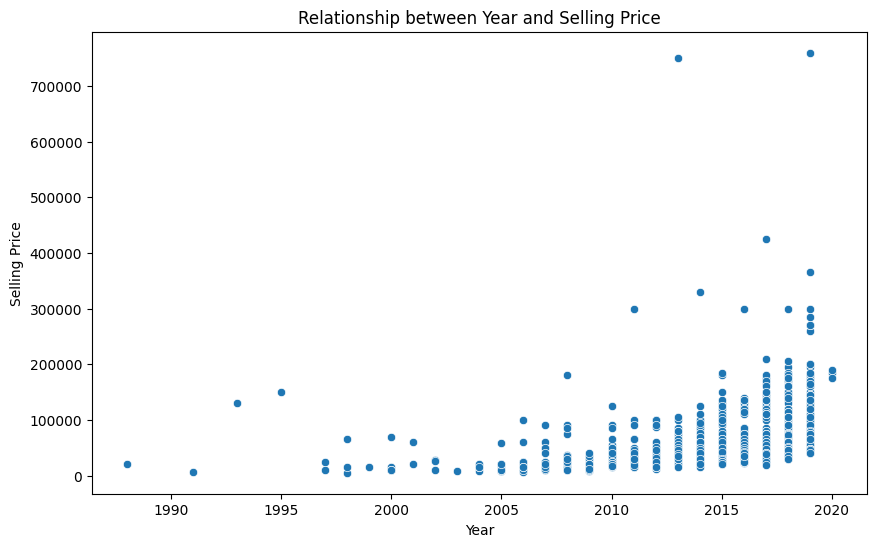

In [28]:
#Q12  Perform a bivariate analysis to visualize the relationship between year and selling_price ?
# Scatter plot to visualize the relationship between year and selling_price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Relationship between Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

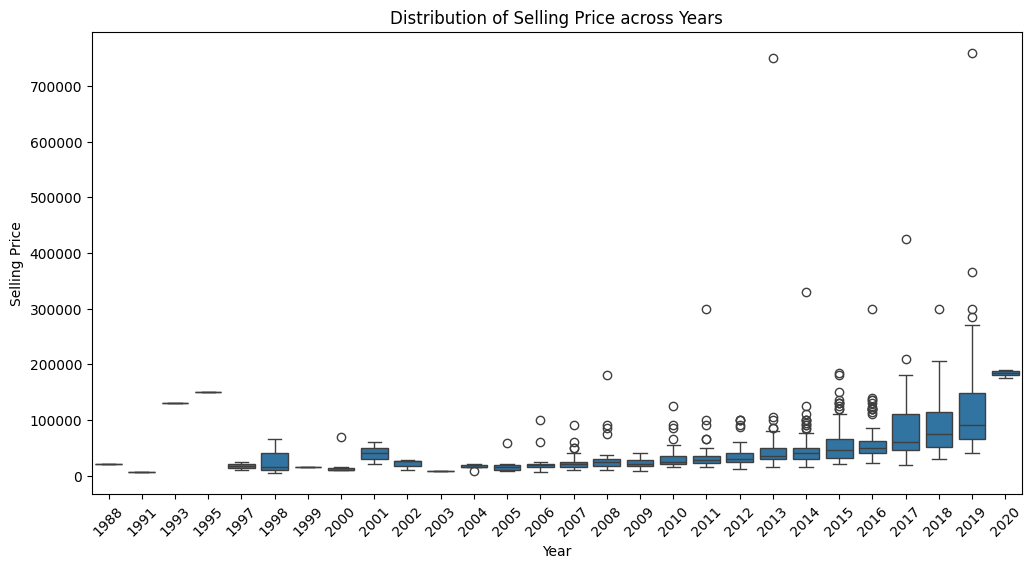

In [29]:
# Box plot to visualize the distribution of selling_price across different years
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='selling_price', data=df)
plt.title('Distribution of Selling Price across Years')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()


In [30]:
#Q13  What is the average depreciation in selling price based on the bike's age (current year - manufacturing year) ?
# Calculate the current year (2024)
current_year = 2024

# Calculate the age of each bike
df['bike_age'] = current_year - df['year']

# Calculate the depreciation in selling price
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']

# Calculate the average depreciation for each bike age
average_depreciation_by_age = df.groupby('bike_age')['depreciation'].mean()

# Display the results
print("Average depreciation in selling price based on bike's age:")
print(average_depreciation_by_age)


Average depreciation in selling price based on bike's age:
bike_age
4    -34260.000000
5      2954.562500
6     13023.194805
7     22306.082353
8     28328.190476
9     28013.275000
10    34505.606061
11    43086.886792
12    37317.648649
13    47102.666667
14    45658.928571
15    38227.785714
16    54732.428571
17    42399.000000
18    39664.500000
19    44852.000000
20    36852.000000
21             NaN
22             NaN
23    34852.000000
24             NaN
25             NaN
26             NaN
27             NaN
29             NaN
31             NaN
33             NaN
36             NaN
Name: depreciation, dtype: float64


In [31]:
#Q14 Which bike names are priced significantly above the average price for their manufacturing year ?

# Calculate the average selling price for each manufacturing year
average_price_by_year = df.groupby('year')['selling_price'].mean()

# Merge this back with the original data to compare each bike's price with the average for its year
data_with_avg = df.merge(average_price_by_year, on='year', suffixes=('', '_avg'))

# Define a threshold for "significantly above average" (e.g., 20% above the average price)
threshold = 1.2

# Filter bikes whose selling price is significantly above the average
significantly_above_avg_bikes = data_with_avg[data_with_avg['selling_price'] > threshold * data_with_avg['selling_price_avg']]

# Display the bike names that are priced significantly above the average
significantly_above_avg_bikes_names = significantly_above_avg_bikes['name']
print("Bikes priced significantly above the average price for their manufacturing year:")
print(significantly_above_avg_bikes_names)


Bikes priced significantly above the average price for their manufacturing year:
0                  Royal Enfield Classic 350
2        Royal Enfield Classic Gunmetal Grey
7       Royal Enfield Bullet 350 [2007-2011]
13                             Yamaha YZF R3
17                          Yamaha YZF R15 S
                        ...                 
984                Royal Enfield Classic 500
985                Royal Enfield Classic 500
1005                      TVS Apache RTR 160
1008                      Bajaj Pulsar 220 F
1023                  Bajaj Avenger 220 dtsi
Name: name, Length: 233, dtype: object


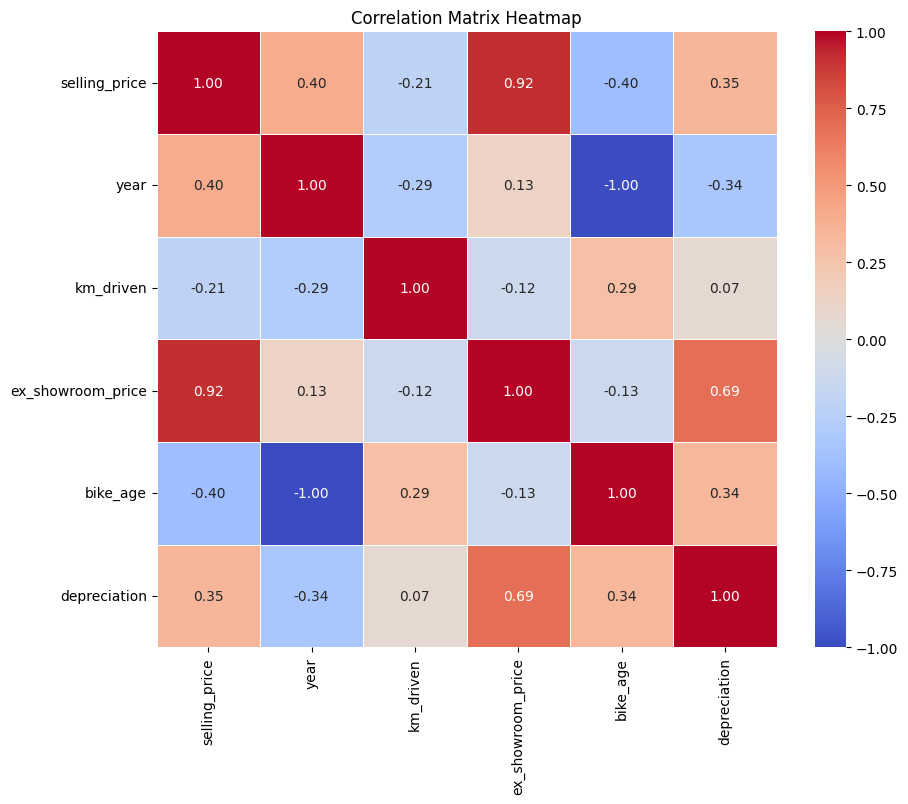

In [32]:
#Q15 Develop a correlation matrix for numeric columns and visualize it using a heatmap ?
# Select numeric columns from the dataset
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()